<a href="https://colab.research.google.com/github/Rajanpandit88/CTR-Optimization/blob/main/CTR_Optimization(Rajan_Pandit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJECT NOTES:

# Company name: `ConnectSphere - Degital AD`

Issue of company : "ConnectSphere Digital is wasting its clients'     money by showing ads to everyone, instead of focusing on the people
                    who are actually likely to be Interested. They need a smarter, Data-driven way to find the right audience.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset

In [5]:
try:
    ad_data = pd.read_csv('/content/advertising.csv')
except FileNotFoundError:
    print("Error: 'advertising.csv' not found. Please ensure the file is in the same directory.")
    exit()

# Exploratory Data Analysis

In [6]:
print("--- Data Info ---")
ad_data.info()
print("\n--- Descriptive Statistics ---")
print(ad_data.describe())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB

--- Descriptive Statistics ---
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000 

# Check for missing values

In [7]:
print("\n--- Missing Values ---")
print(ad_data.isnull().sum())


--- Missing Values ---
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


# Visualizing the data

In [9]:
sns.set_style('whitegrid')

# Age distribution

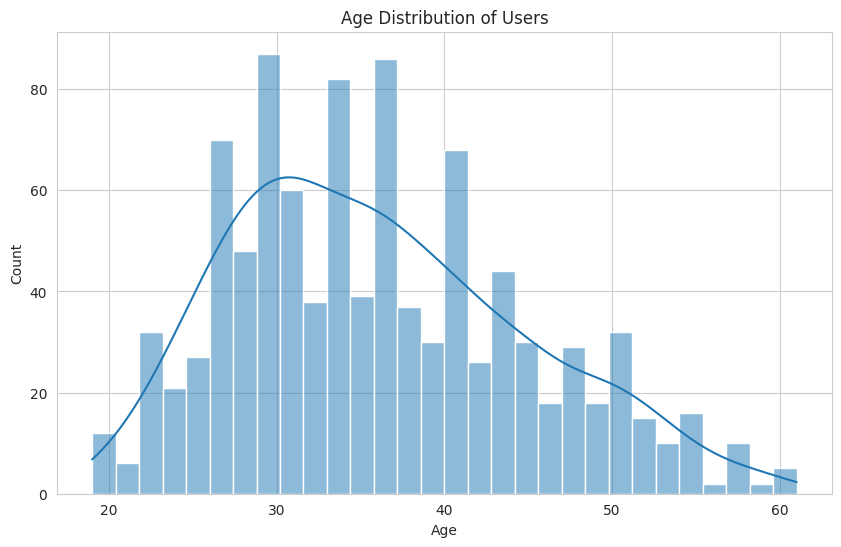

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(ad_data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.show()

# Jointplot of Area Income vs. Age

<Figure size 1000x600 with 0 Axes>

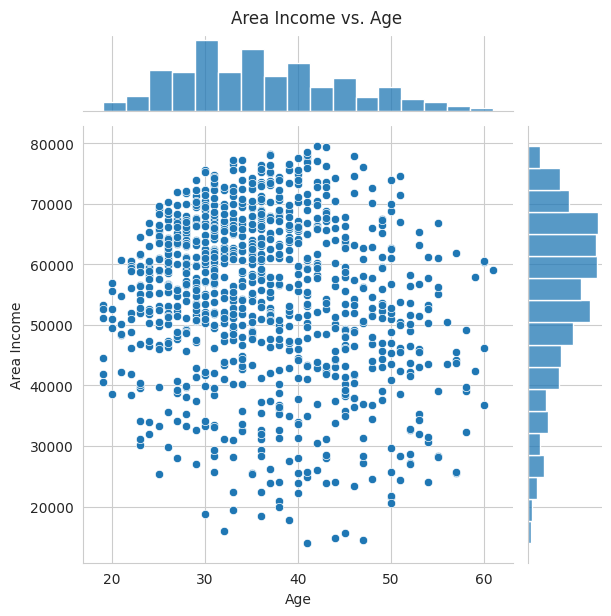

In [11]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='Area Income', data=ad_data)
plt.suptitle('Area Income vs. Age', y=1.02)
plt.show()

# Jointplot of Daily Time Spent on Site vs. Age

<Figure size 1000x600 with 0 Axes>

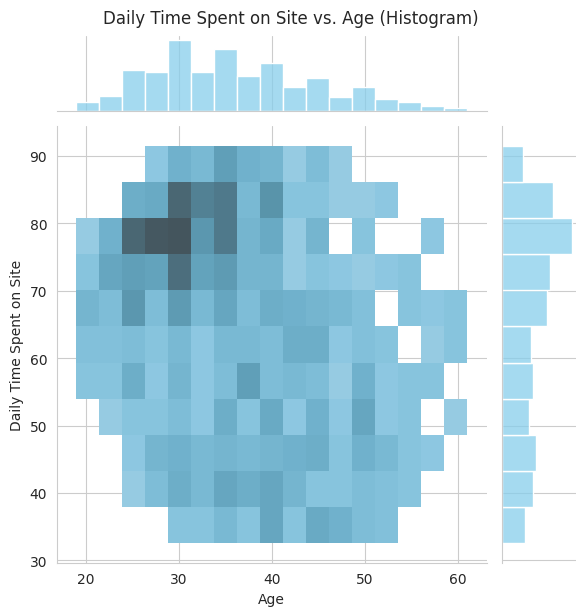

In [43]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='hist', color='skyblue')
plt.suptitle('Daily Time Spent on Site vs. Age (Histogram)', y=1.02)
plt.show()

# Jointplot of Daily Time Spent on Site vs. Daily Internet Usage


<Figure size 1000x600 with 0 Axes>

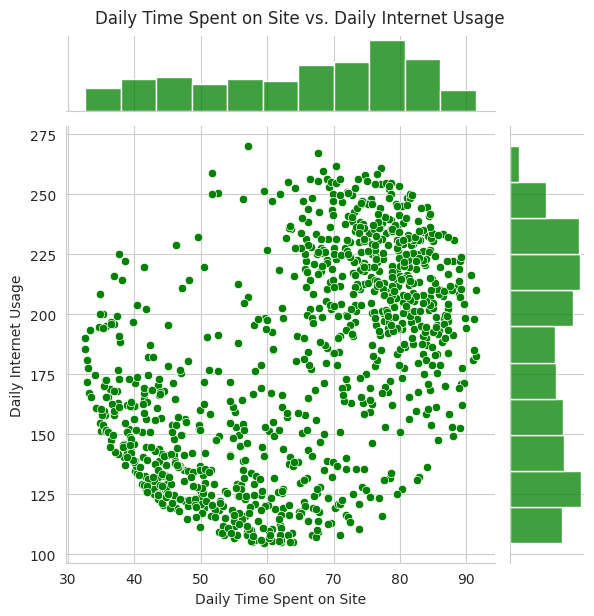

In [19]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')
plt.suptitle('Daily Time Spent on Site vs. Daily Internet Usage', y=1.02)
plt.show()

# Pairplot to visualize relationships between numerical features, colored by 'Clicked on Ad'


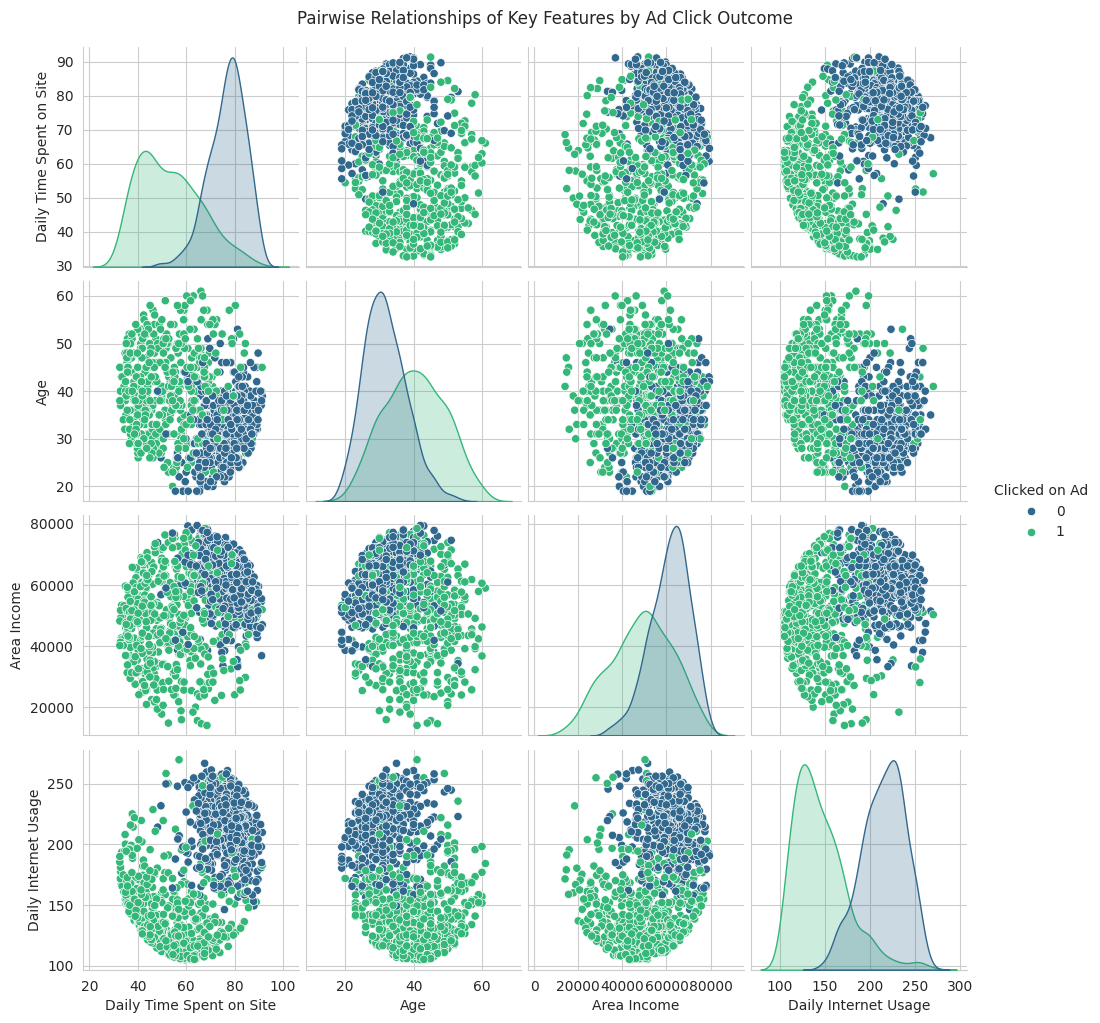

In [30]:
sns.pairplot(ad_data, hue='Clicked on Ad', vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette='viridis')
plt.suptitle('Pairwise Relationships of Key Features by Ad Click Outcome', y=1.02)
plt.show()

# --- Logistic Regression Model ---
Define features (X) and target (y)

In [31]:
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
X = ad_data[features]
y = ad_data['Clicked on Ad']

# Split the data into training and testing sets


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Create and train the logistic regression model

In [34]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# --- Model Evaluation ---

Make predictions on the test set


In [35]:
predictions = logmodel.predict(X_test)

# Print the classification report

In [36]:
print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Generate and visualize the confusion matrix

In [37]:
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, predictions)
print(cm)


--- Confusion Matrix ---
[[149   8]
 [ 15 128]]


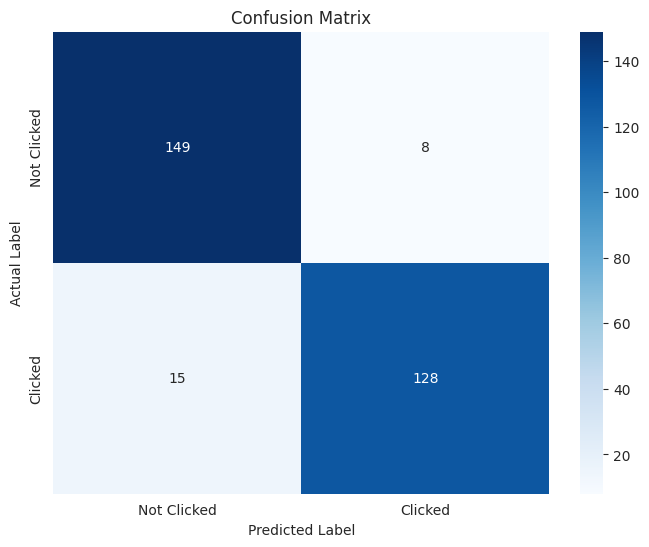

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()